<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset




In [3]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

Print the first 5 entries of the dataset to confirm loading.


In [4]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],axis=0, inplace=True)
df.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


(0.0, 3974.15)

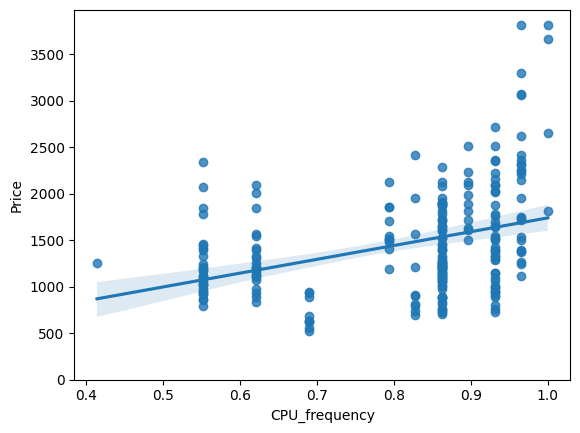

In [5]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
import seaborn
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

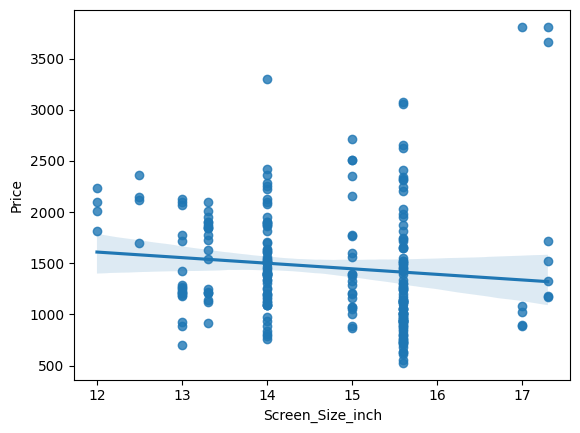

In [6]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch', y='Price', data = df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

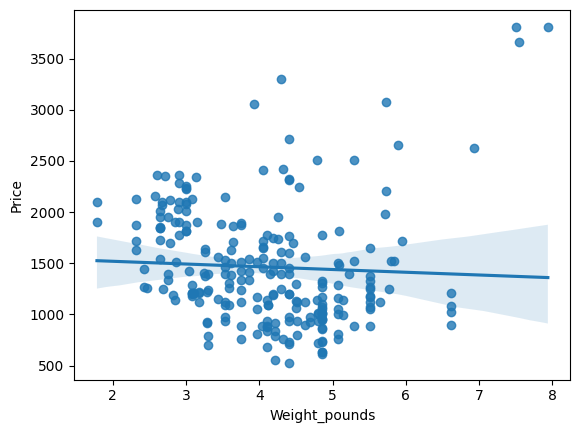

In [7]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x='Weight_pounds',y='Price',data = df)

In [8]:
# Correlation values of the three attributes with Price

for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

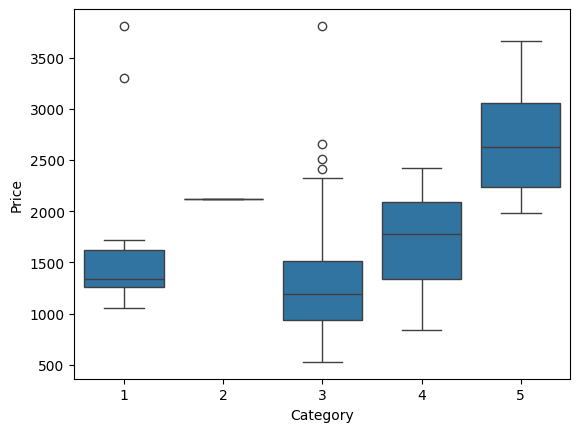

In [9]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(x='Category',y='Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

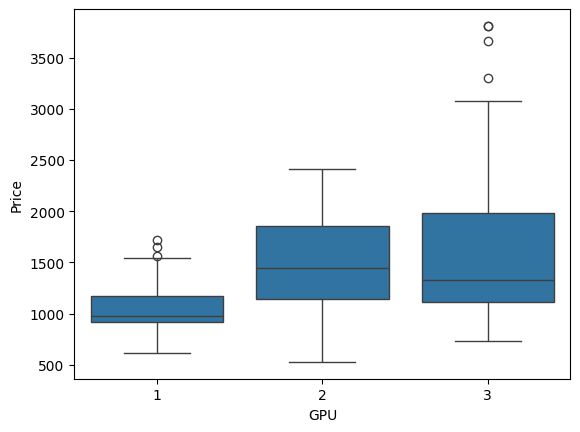

In [10]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

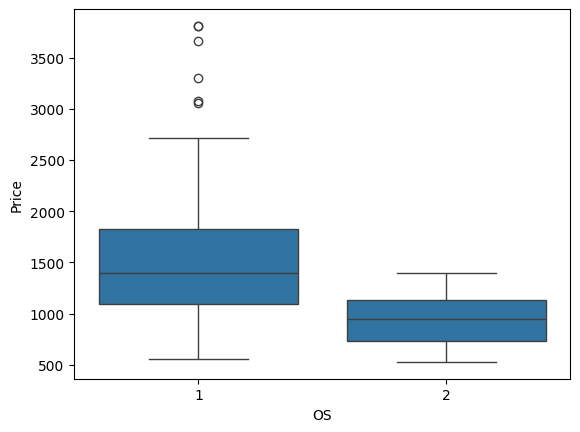

In [11]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x='OS', y='Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

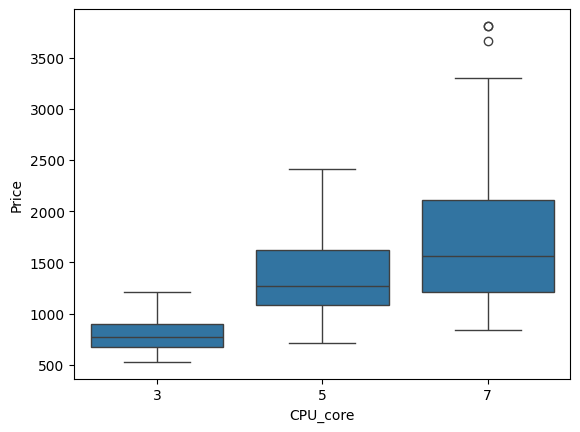

In [12]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

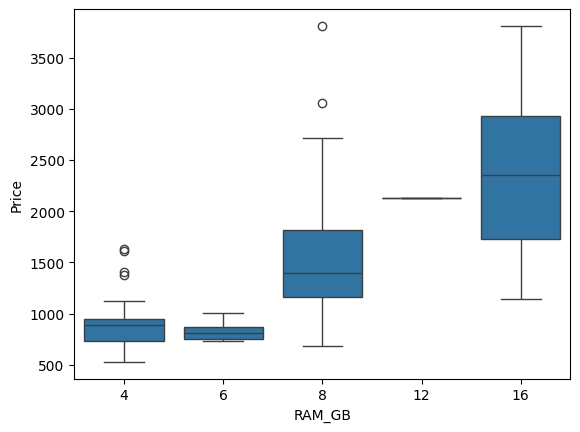

In [13]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

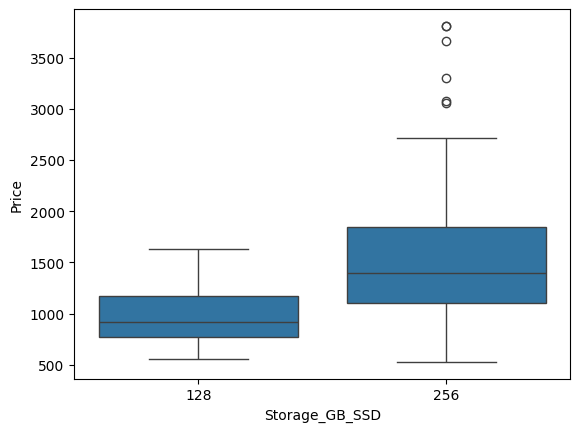

In [14]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [15]:
# Write your code below and press Shift+Enter to execute
df.describe(include='all')

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [16]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_group = pd.DataFrame(df.groupby(['GPU','CPU_core'])['Price'].mean())
df_group

Price
GPU CPU_core             
1   3          769.250000
    5          998.500000
    7         1167.941176
2   3          785.076923
    5         1462.197674
    7         1744.621622
3   3          784.000000
    5         1220.680000
    7         1945.097561

In [17]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
df_pivot = df_group.reset_index().pivot(index='GPU', columns='CPU_core', values='Price')
df_pivot 

CPU_core,3,5,7
GPU,,,
1,769.250000,998.500000,1167.941176
2,785.076923,1462.197674,1744.621622
3,784.000000,1220.680000,1945.097561


Text(0.5, 1.0, 'Average Price per GPU and CPU Core')

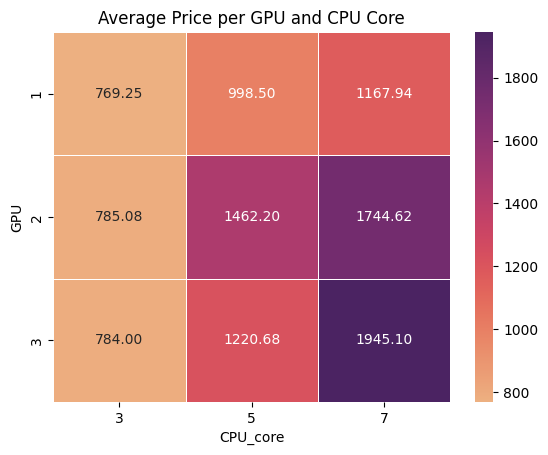

In [18]:
# Write your code below and press Shift+Enter to execute
# Create the Plot

sns.heatmap(data= df_pivot, annot=True, fmt='.2f', linewidths=0.5, cmap='flare')
plt.title('Average Price per GPU and CPU Core')

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [19]:
# Write your code below and press Shift+Enter to execute
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857842  with a P-value of P = 3.681560628842986e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134316e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.00014898923191724212
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118269  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751551  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009089e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827398  with a P-value of P = 0.0005696642559246697
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273

# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
